NameError: name 'np' is not defined

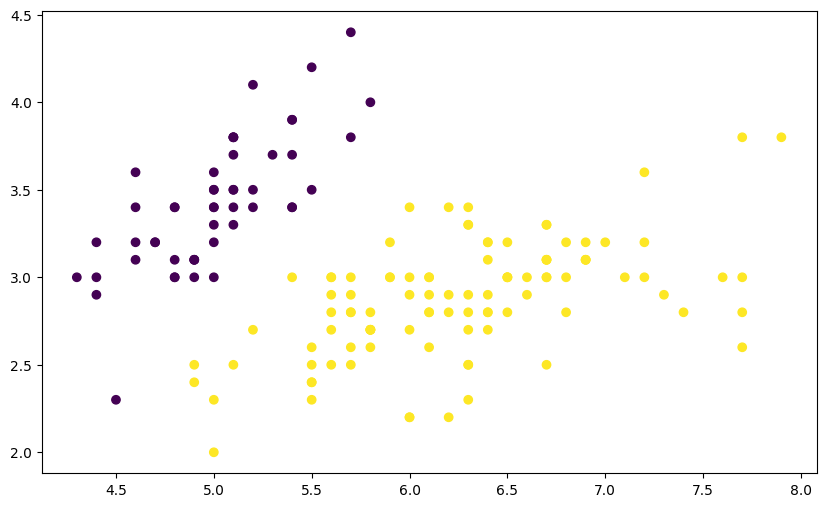

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline


df = pd.read_csv("course-8-data.csv", header=0,)  # 加载数据集
df.head()  # 预览前 5 行数据


plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])



def sigmoid(z):
    # Sigmoid 分布函数
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid


def loss(h, y):
    # 损失函数
    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return loss


def gradient(X, h, y):
    # 梯度计算
    gradient = np.dot(X.T, (h - y)) / y.shape[0]
    return gradient


def Logistic_Regression(x, y, lr, num_iter):
    # 逻辑回归过程
    intercept = np.ones((x.shape[0], 1))  # 初始化截距为 1
    x = np.concatenate((intercept, x), axis=1)
    w = np.zeros(x.shape[1])  # 初始化参数为 0

    for i in range(num_iter):  # 梯度下降迭代
        z = np.dot(x, w)  # 线性函数
        h = sigmoid(z)  # sigmoid 函数

        g = gradient(x, h, y)  # 计算梯度
        w -= lr * g  # 通过学习率 lr 计算步长并执行梯度下降

        l = loss(h, y)  # 计算损失函数值

    return l, w  # 返回迭代后的梯度和参数

x = df[["X0", "X1"]].values
y = df["Y"].values
lr = 0.01  # 学习率
num_iter = 30000  # 迭代次数

# 训练
L = Logistic_Regression(x, y, lr, num_iter)
L


plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

x1_min, x1_max = (
    df["X0"].min(),
    df["X0"].max(),
)
x2_min, x2_max = (
    df["X1"].min(),
    df["X1"].max(),
)

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, np.array([L[1][1:3]]).T) + L[1][0]).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0], linewidths=1, colors="red")

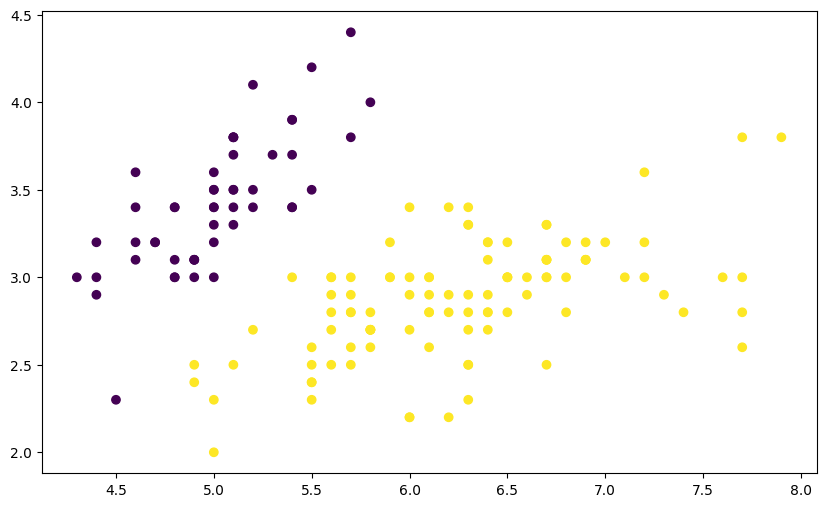

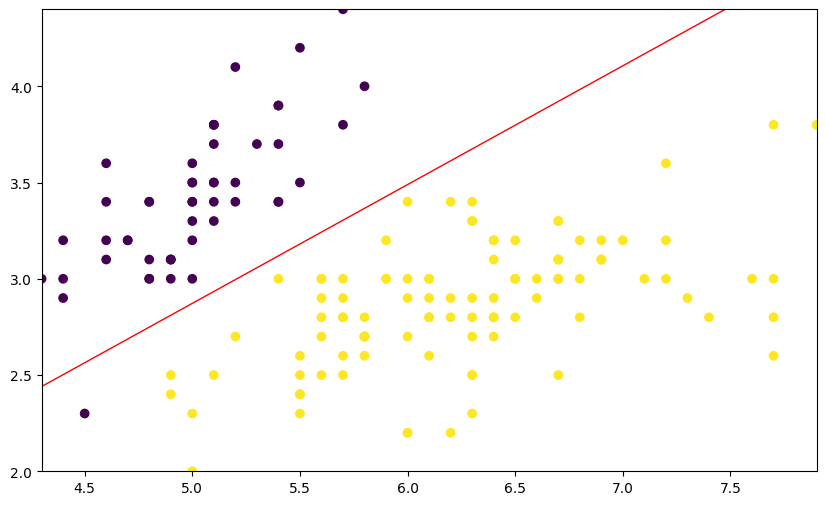

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


%matplotlib inline


df = pd.read_csv("course-8-data.csv", header=0,)  # 加载数据集
df.head()  # 预览前 5 行数据


plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])



def sigmoid(z):
    # Sigmoid 分布函数
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid


def loss(h, y):
    # 损失函数
    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return loss


def gradient(X, h, y):
    # 梯度计算
    gradient = np.dot(X.T, (h - y)) / y.shape[0]
    return gradient


def Logistic_Regression(x, y, lr, num_iter):
    # 逻辑回归过程
    intercept = np.ones((x.shape[0], 1))  # 初始化截距为 1
    x = np.concatenate((intercept, x), axis=1)
    w = np.zeros(x.shape[1])  # 初始化参数为 0

    for i in range(num_iter):  # 梯度下降迭代
        z = np.dot(x, w)  # 线性函数
        h = sigmoid(z)  # sigmoid 函数

        g = gradient(x, h, y)  # 计算梯度
        w -= lr * g  # 通过学习率 lr 计算步长并执行梯度下降

        l = loss(h, y)  # 计算损失函数值

    return l, w  # 返回迭代后的梯度和参数

x = df[["X0", "X1"]].values
y = df["Y"].values
lr = 0.01  # 学习率
num_iter = 30000  # 迭代次数

# 训练
L = Logistic_Regression(x, y, lr, num_iter)
L


plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

x1_min, x1_max = (
    df["X0"].min(),
    df["X0"].max(),
)
x2_min, x2_max = (
    df["X1"].min(),
    df["X1"].max(),
)

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, np.array([L[1][1:3]]).T) + L[1][0]).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0], linewidths=1, colors="red")